In [ ]:
import pandas as pd
import numpy as np
import os, time, sys

#케라스 사전 학습 모델 불러오기
from keras.applications import VGG16, ResNet101, DenseNet121, EfficientNetB0
from glob import glob
from PIL import Image


import matplotlib.pyplot as plt
import ipywidgets

**ImageNet Large Scale Visual Recognition Challenge 2012 (ILSVRC2012)**

고해상도 이미지셋, 1000개 클래스, 120만개 학습이미지, 5만개 검증 이미지, Labeling 데이터 등

https://image-net.org/challenges/LSVRC/2012/2012-downloads.php





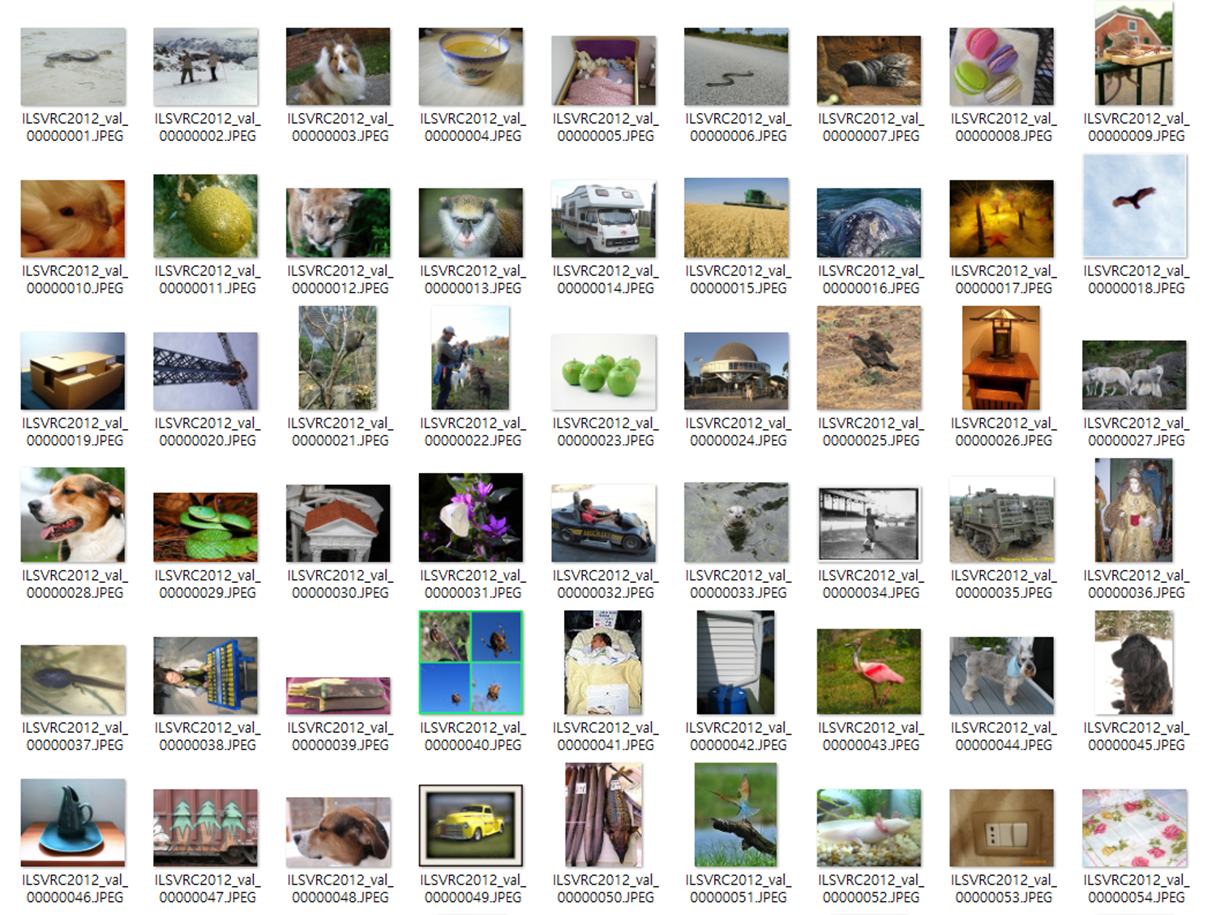

In [ ]:
!wget "https://hycms.hanyang.ac.kr/index.php?module=xn_media_content2013&act=dispXn_media_content2013DownloadContent&content_id=6715e0982d404" -O "data.zip"
!unzip  -O cp949 "data.zip" -d "data"

In [ ]:
#이미지넷 검증 이미지와 라벨링 정보 불러오기

label = pd.read_csv('data/imagenet/Label.txt', sep='|').set_index('idx')
print(label.shape)
label.head(10)


flist= glob('data/imagenet/*.JPEG')
print(len(flist))

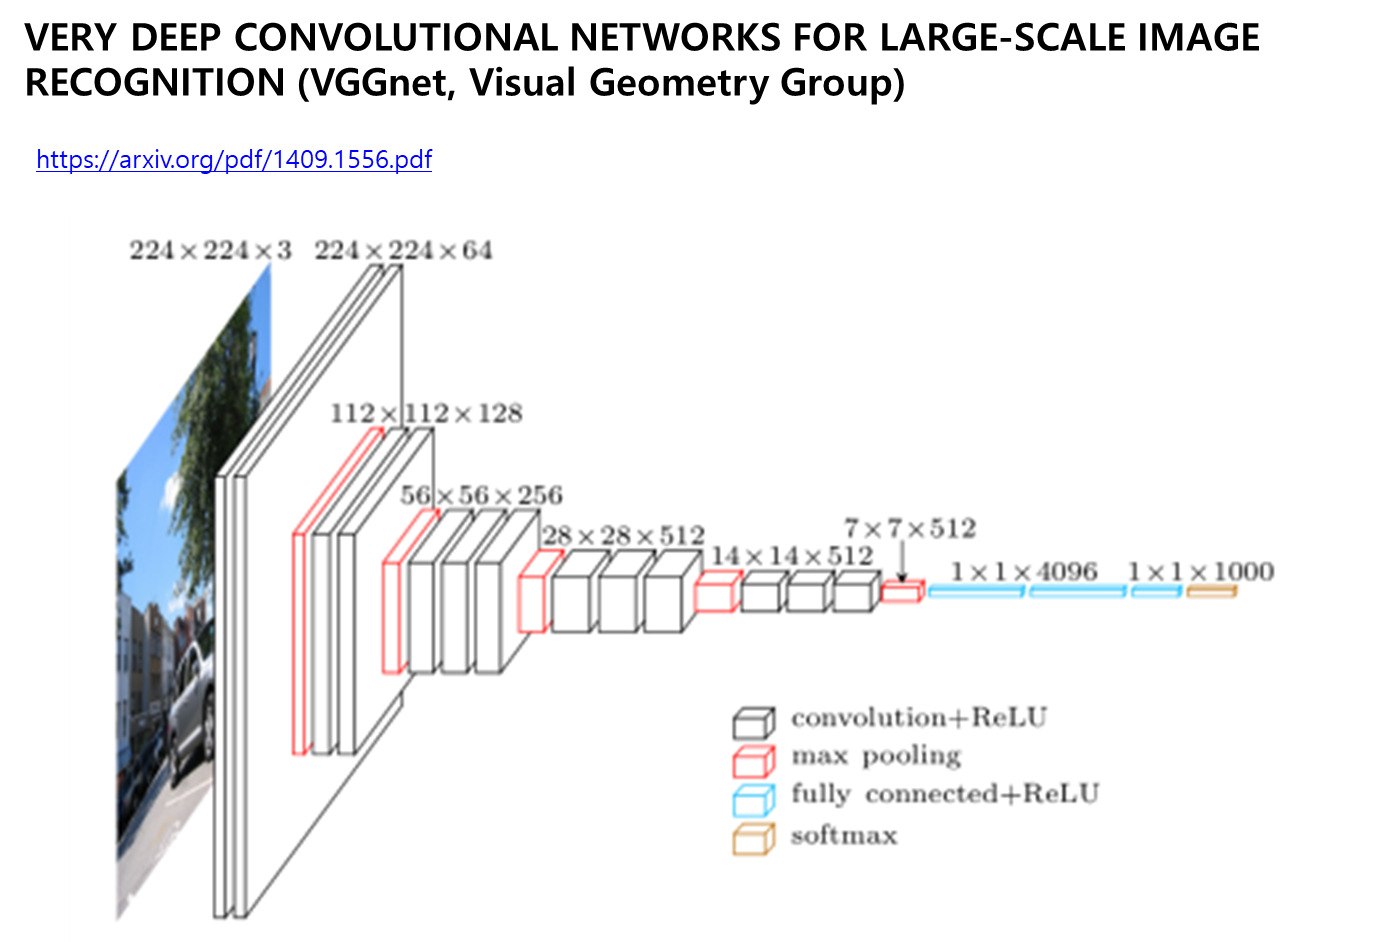

In [ ]:
# VGG16 모델 imagenet 사전학습된 가중치로 불러오기

model = VGG16(include_top=True, weights='imagenet')
model.summary()


In [ ]:
#학습 내용 출력용 함수
def diplay_result(idx = 0) :
  global model, flist

  img = Image.open(flist[idx])
  img = img.resize((224, 224), Image.LANCZOS)
  img = np.array(img)

  predict_y = model.predict(img[np.newaxis, :, :, :])

  dpi = 80

  figsize = 500/float(dpi), 500/float(dpi)
  fig = plt.figure(figsize=figsize)
  plt.imshow(img)
  plt.title(label.iloc[np.where(predict_y == predict_y.max())[1][0]].values[0])
  plt.show()

In [ ]:
#위젯을 이용하여  검증 결과 출력하기
ipywidgets.interact(diplay_result, idx=(0, len(flist), 1) )

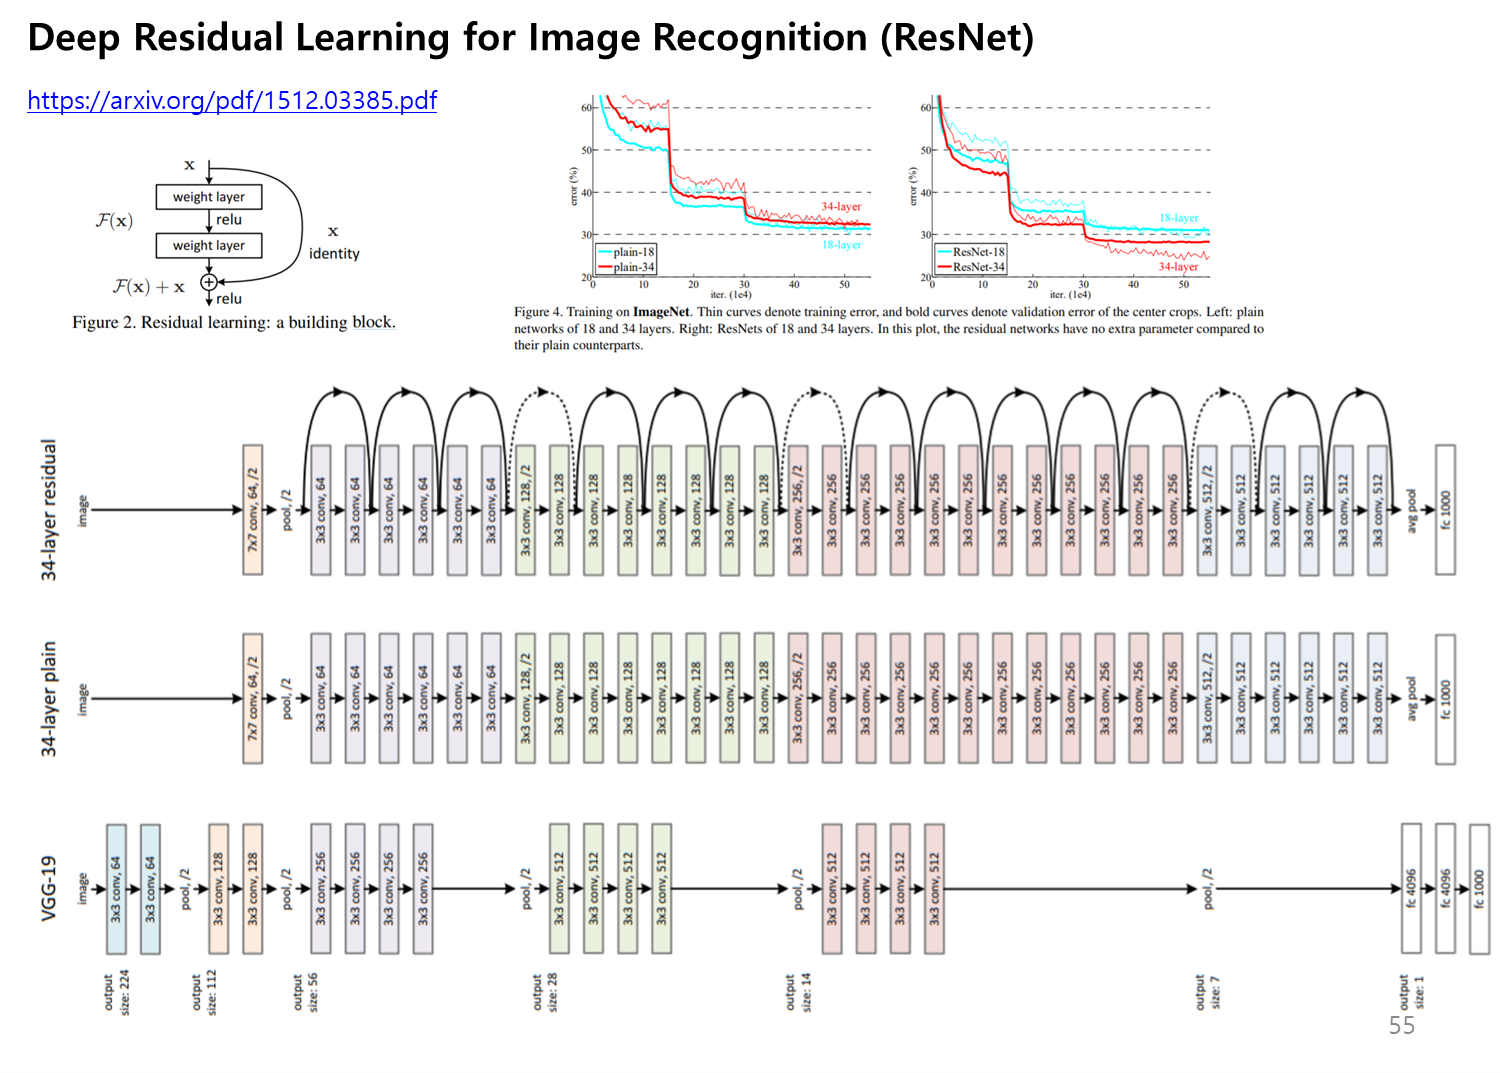

In [ ]:
# ResNet101 모델 imagenet 사전학습된 가중치로 불러오기

model = ResNet101(include_top=True, weights='imagenet')
model.summary()


In [ ]:
#위젯을 이용하여  검증 결과 출력하기
ipywidgets.interact(diplay_result, idx=(0, len(flist), 1) )

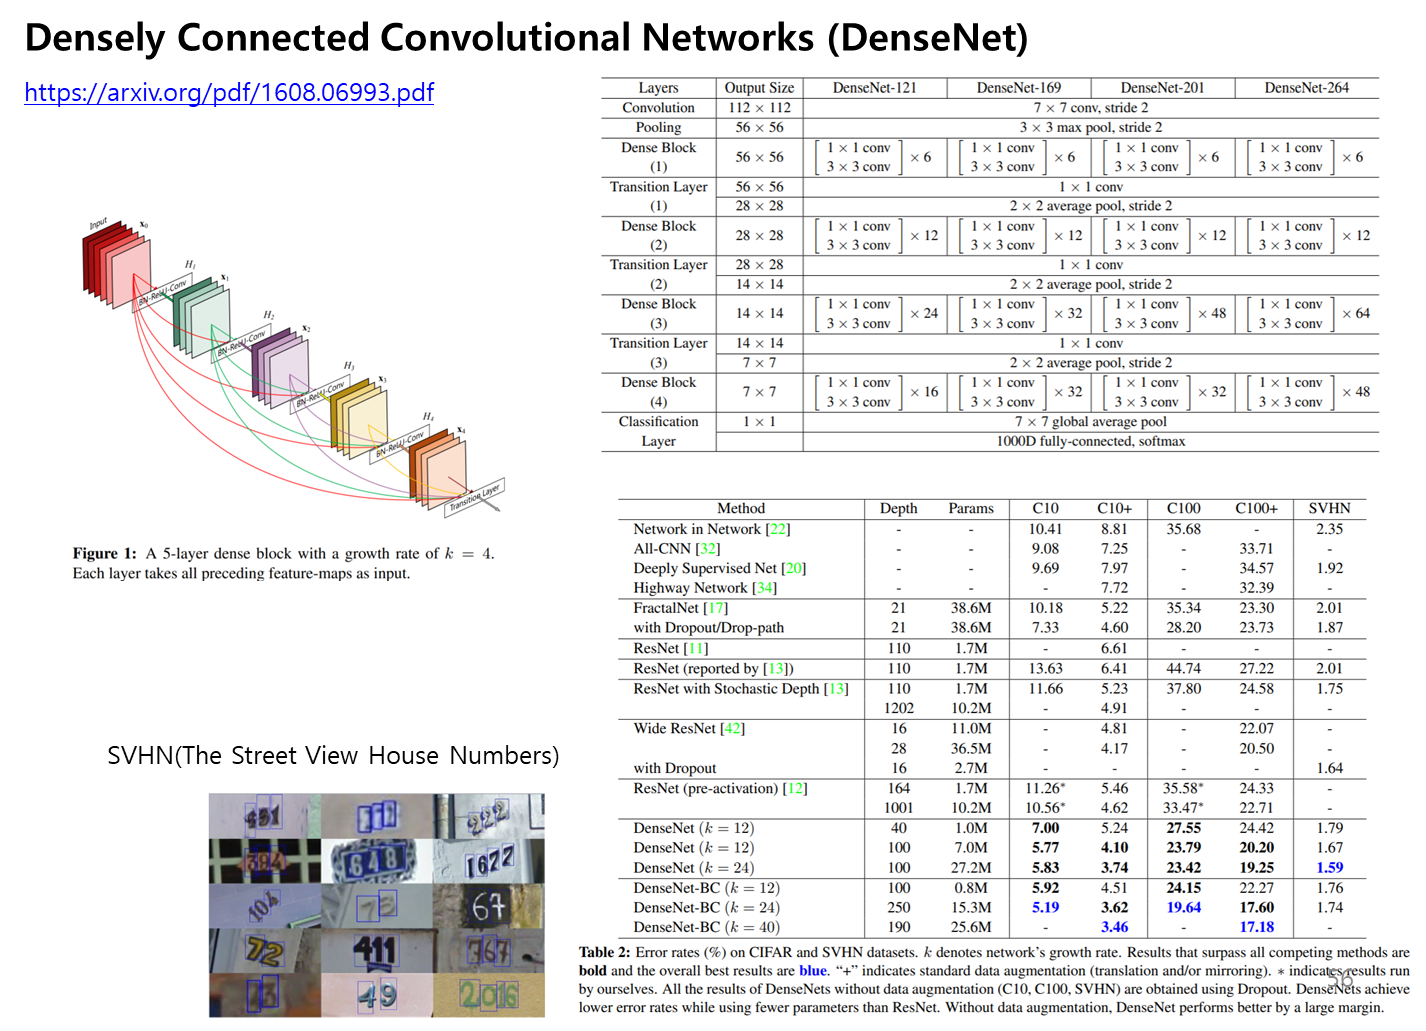

In [ ]:
# DenseNet121 모델 imagenet 사전학습된 가중치로 불러오기

model = DenseNet121(include_top=True, weights='imagenet')
model.summary()


In [ ]:
#위젯을 이용하여  검증 결과 출력하기
ipywidgets.interact(diplay_result, idx=(0, len(flist), 1) )

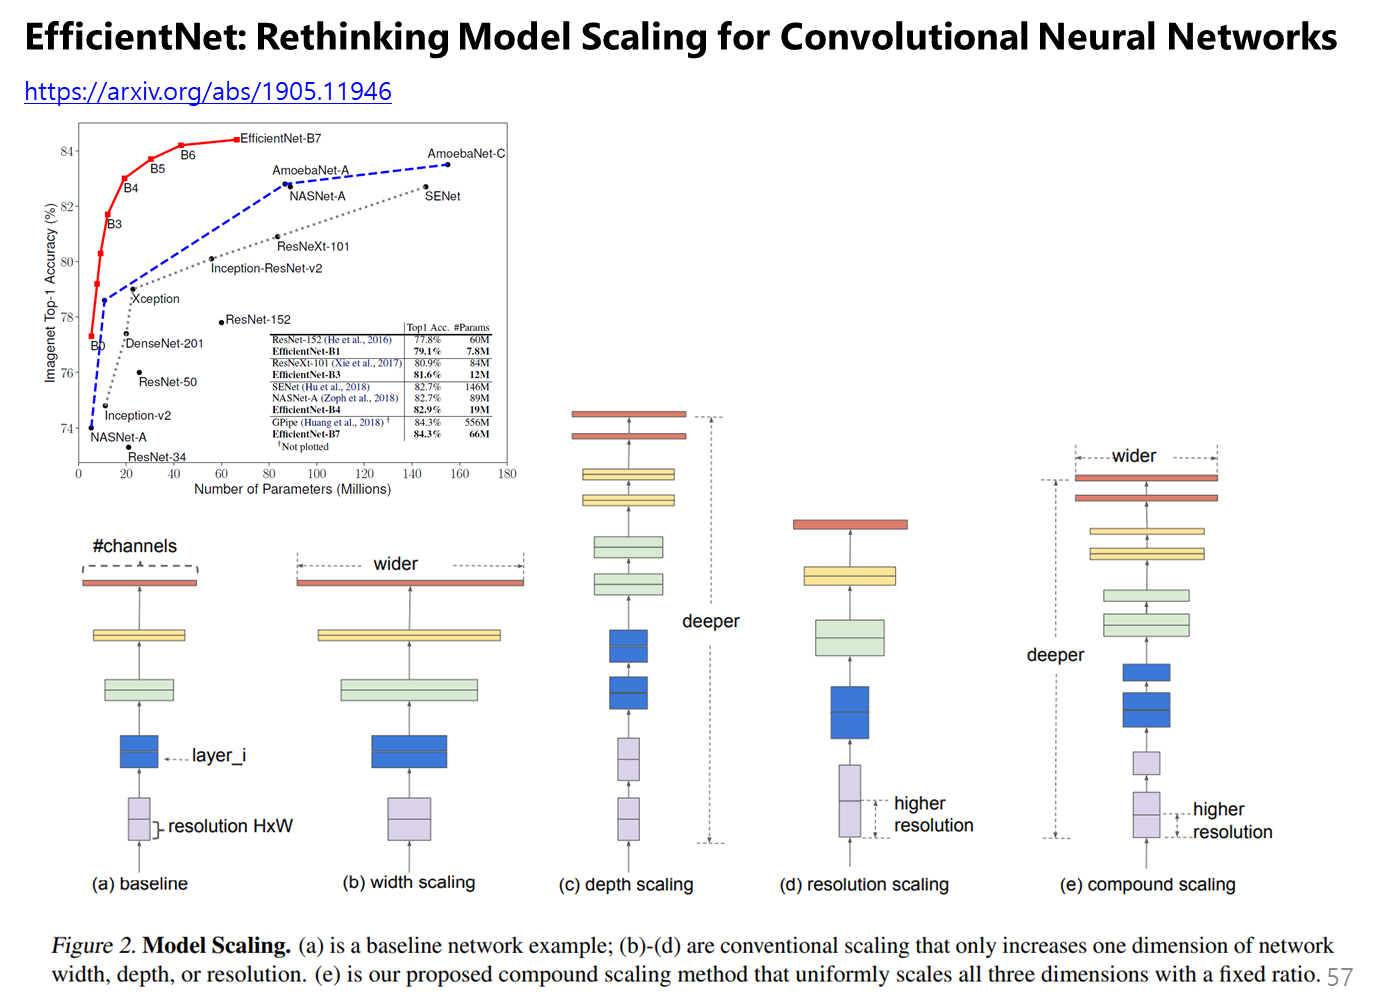

In [ ]:

# EfficientNetB0 모델 imagenet 사전학습된 가중치로 불러오기

model = EfficientNetB0(include_top=True, weights='imagenet')
model.summary()


In [ ]:
#위젯을 이용하여  검증 결과 출력하기
ipywidgets.interact(diplay_result, idx=(0, len(flist), 1) )
